[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Model Accuracy: 0.8492

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4961
           1       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



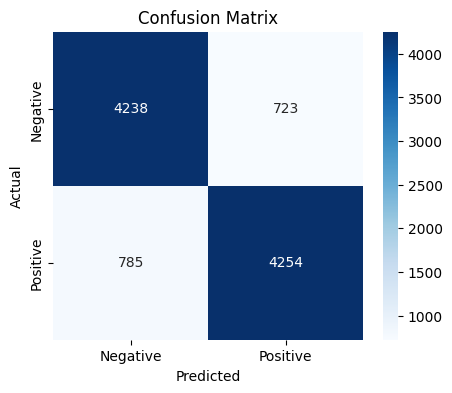

ROC-AUC Score: 0.8492


In [2]:


# Import necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Download stopwords
nltk.download('stopwords')

# Step 1: Load the dataset
file_path = "/content/IMDB Dataset.csv"  # Ensure this file is uploaded to Colab
df = pd.read_csv(file_path)

# Check dataset structure
print(df.head())

# Step 2: Preprocess the text
def preprocess_text(text):
    """Clean and preprocess the input text"""
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabet characters
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Tokenization
    ps = PorterStemmer()
    stop_words = set(stopwords.words('english'))
    words = [ps.stem(word) for word in words if word not in stop_words]  # Stemming & Stopword removal
    return " ".join(words)

# Apply preprocessing to the dataset
df['clean_text'] = df['review'].apply(preprocess_text)

# Convert labels (positive = 1, negative = 0)
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 3: Split dataset into train & test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Step 4: Convert text data into numerical representation using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Step 5: Train a Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 6: Predict on test data
y_pred = model.predict(X_test_vec)

# Step 7: Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 8: Calculate and Display ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")
